# LSTM Model Without Using Any Pretrained Weights

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')
data[2010:].head(10)

,id,keyword,location,text,target
2010,2886,damage,NaN,Beach did damage to my shit,1
2011,2887,damage,NaN,@WonderousAllure crosses her arms to cover her...,0
2012,2888,damage,NaN,New post on my blog: http://t.co/Avu9b4k2rv \n...,0
2013,2889,damage,Charlotte NC,REPORTED: HIT &amp; RUN-IN ROADWAY-PROPERTY DA...,1
2014,2890,damage,NaN,Devil May Cry 4 Special Edition Vergil Vs Agnu...,0
2015,2891,damage,"Rockville, Maryland",#Glaucoma occurs when fluid builds up pressure...,1
2016,2893,damage,NaN,#JSunNews Storm damage reported in Madison Cou...,1
2017,2895,damage,NaN,S61.231A Puncture wound without foreign body o...,1
2018,2896,damage,Australia,Thank you @RicharkKirkArch @AusInstArchitect f...,0
2019,2898,damage,Your Conversation,This real shit will damage a bitch,0


In [2]:

# if location was specified --> 1, else --> 0
data['location'] = data['location'].notnull().astype(int)
data['location'] = data['location'].fillna(0)


data['text'] = data['text'].str.replace('http\S+', 'http', regex=True)  # replace all URLs with "http"
data['text'] = data['text'].str.replace('&\S+', '', regex=True)  # remove all html junks
data['text'] = data['text'].str.replace('[0-9]','0', regex=True)  # replace all integer valeus with 0
data['text'] = data['text'].str.replace('[^a-zA-Z0 ]', '', regex=True)
data['text'] = data['text'].str.lower()
data[2010:].head(10)

,id,keyword,location,text,target
2010,2886,damage,0,beach did damage to my shit,1
2011,2887,damage,0,wonderousallure crosses her arms to cover her ...,0
2012,2888,damage,0,new post on my blog http thesensualeyemodel ca...,0
2013,2889,damage,1,reported hit runin roadwayproperty damage at ...,1
2014,2890,damage,0,devil may cry 0 special edition vergil vs agnu...,0
2015,2891,damage,1,glaucoma occurs when fluid builds up pressure ...,1
2016,2893,damage,0,jsunnews storm damage reported in madison coun...,1
2017,2895,damage,0,s00000a puncture wound without foreign body of...,1
2018,2896,damage,1,thank you richarkkirkarch ausinstarchitect for...,0
2019,2898,damage,1,this real shit will damage a bitch,0


In [3]:
config = {
    'token_num_words' : 10000,
    'embedding_dim' : 32,
    'sent_max_len' : 30,
    'key_embedding_dim' : 8,
}

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=config['token_num_words'], oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
list(tokenizer.word_index.keys())[:10]

['<OOV>', 'http', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [5]:
text_seq = tokenizer.texts_to_sequences(data['text'])  # convert text to numerics
data.insert(4, 'text_seq', text_seq)

data['keyword'] = pd.Categorical(data['keyword']).codes  # change keyword from string to numerics
data['keyword'] += 1
key_num_words = data['keyword'].nunique()

data[2010:].head(10)

,id,keyword,location,text,text_seq,target
2010,2886,58,0,beach did damage to my shit,"[860, 149, 225, 6, 14, 210]",1
2011,2887,58,0,wonderousallure crosses her arms to cover her ...,"[9488, 3860, 81, 2153, 6, 1269, 81, 1730, 23, ...",0
2012,2888,58,0,new post on my blog http thesensualeyemodel ca...,"[53, 356, 12, 14, 1699, 2, 9490, 3862, 9491, 9...",0
2013,2889,58,1,reported hit runin roadwayproperty damage at ...,"[975, 228, 9495, 9496, 225, 20, 260, 9497, 817]",1
2014,2890,58,0,devil may cry 0 special edition vergil vs agnu...,"[5262, 129, 2223, 16, 1368, 2156, 9498, 906, 9...",0
2015,2891,58,1,glaucoma occurs when fluid builds up pressure ...,"[9502, 3864, 44, 5263, 4999, 30, 1601, 598, 91...",1
2016,2893,58,0,jsunnews storm damage reported in madison coun...,"[9506, 92, 225, 975, 5, 3865, 363, 267, 225, 9...",1
2017,2895,58,0,s00000a puncture wound without foreign body of...,"[9507, 5264, 3111, 236, 3866, 86, 7, 505, 9508...",1
2018,2896,58,1,thank you richarkkirkarch ausinstarchitect for...,"[504, 13, 9510, 9511, 11, 615, 7, 298, 416, 95...",0
2019,2898,58,1,this real shit will damage a bitch,"[22, 388, 210, 42, 225, 4, 1477]",0


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

seq_input = pad_sequences(data['text_seq'], maxlen=config['sent_max_len'], padding='post', truncating='post')
key_input = data['keyword'].to_numpy()
key_input = np.reshape(key_input, (key_input.shape[0], 1))
loc_input = data['location'].to_numpy()
loc_input = np.reshape(loc_input, (loc_input.shape[0], 1))

output = data['target'].to_numpy()

print("seq_input Shape: ", seq_input.shape)
print("key_input Shape: ", key_input.shape)
print("loc_input Shape: ", loc_input.shape)
print("output Shape: ", output.shape)

seq_input Shape:  (7613, 30)
key_input Shape:  (7613, 1)
loc_input Shape:  (7613, 1)
output Shape:  (7613,)


In [8]:
import tensorflow as tf

x_seq = tf.keras.layers.Input(shape=(config['sent_max_len']), name='seq_input')
x1 = tf.keras.layers.Embedding(config['token_num_words'], config['embedding_dim'])(x_seq)
x1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x1)
x1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x1)


x_key = tf.keras.layers.Input(shape=(1), name='key_input')
x2 = tf.keras.layers.Embedding(key_num_words, config['key_embedding_dim'])(x_key)
x2 = tf.keras.layers.Flatten()(x2)

x_loc = tf.keras.layers.Input(shape=(1), name='loc_input')

x = tf.keras.layers.Concatenate()([x1, x2, x_loc])
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
y = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

model = tf.keras.models.Model(inputs=[x_seq, x_key, x_loc], outputs=y)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_input (InputLayer)          [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 32)       320000      seq_input[0][0]                  
__________________________________________________________________________________________________
key_input (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 30, 128)      49664       embedding[0][0]                  
_______________________________________________________________________________________

In [9]:
history = model.fit(x={'seq_input':seq_input, 'key_input':key_input, 'loc_input':loc_input}, y=output, epochs=20, validation_split=0.1)

Epoch 1/20
215/215 [==============================] - 6s 28ms/step - loss: 0.6807 - accuracy: 0.5631 - val_loss: 0.6796 - val_accuracy: 0.5341
Epoch 2/20
215/215 [==============================] - 5s 25ms/step - loss: 0.5654 - accuracy: 0.7234 - val_loss: 0.5151 - val_accuracy: 0.7533
Epoch 3/20
215/215 [==============================] - 5s 22ms/step - loss: 0.4123 - accuracy: 0.8316 - val_loss: 0.4858 - val_accuracy: 0.7546
Epoch 4/20
215/215 [==============================] - 6s 26ms/step - loss: 0.3297 - accuracy: 0.8732 - val_loss: 0.4823 - val_accuracy: 0.7730
Epoch 5/20
215/215 [==============================] - 5s 24ms/step - loss: 0.2712 - accuracy: 0.8984 - val_loss: 0.5230 - val_accuracy: 0.7625
Epoch 6/20
215/215 [==============================] - 5s 22ms/step - loss: 0.2300 - accuracy: 0.9164 - val_loss: 0.5398 - val_accuracy: 0.7572
Epoch 7/20
215/215 [==============================] - 5s 21ms/step - loss: 0.1879 - accuracy: 0.9315 - val_loss: 0.6560 - val_accuracy: 0.7441

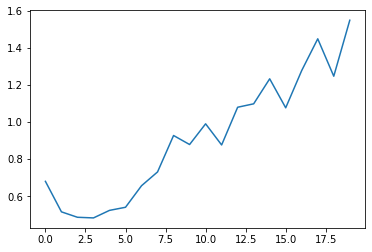

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])

In [11]:
# rebuild the same model to reset weights

x_seq = tf.keras.layers.Input(shape=(config['sent_max_len']), name='seq_input')
x1 = tf.keras.layers.Embedding(config['token_num_words'], config['embedding_dim'])(x_seq)
x1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x1)
x1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x1)


x_key = tf.keras.layers.Input(shape=(1), name='key_input')
x2 = tf.keras.layers.Embedding(key_num_words, config['key_embedding_dim'])(x_key)
x2 = tf.keras.layers.Flatten()(x2)

x_loc = tf.keras.layers.Input(shape=(1), name='loc_input')

x = tf.keras.layers.Concatenate()([x1, x2, x_loc])
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
y = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

model = tf.keras.models.Model(inputs=[x_seq, x_key, x_loc], outputs=y)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_input (InputLayer)          [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 30, 32)       320000      seq_input[0][0]                  
__________________________________________________________________________________________________
key_input (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 30, 128)      49664       embedding_2[0][0]                
_______________________________________________________________________________________

In [12]:
history = model.fit(x={'seq_input':seq_input, 'key_input':key_input, 'loc_input':loc_input}, y=output, epochs=5)

Epoch 1/5
238/238 [==============================] - 5s 20ms/step - loss: 0.6860 - accuracy: 0.5441
Epoch 2/5
238/238 [==============================] - 5s 20ms/step - loss: 0.5595 - accuracy: 0.7133
Epoch 3/5
238/238 [==============================] - 5s 22ms/step - loss: 0.4148 - accuracy: 0.8302
Epoch 4/5
238/238 [==============================] - 5s 22ms/step - loss: 0.3404 - accuracy: 0.8683
Epoch 5/5
238/238 [==============================] - 5s 20ms/step - loss: 0.2855 - accuracy: 0.8944


In [13]:
# Apply Preprocssing to Test Data

test_data = pd.read_csv('test.csv')
test_data['location'] = test_data['location'].notnull().astype(int)
test_data['location'] = test_data['location'].fillna(0)


test_data['text'] = test_data['text'].str.replace('http\S+', 'http', regex=True)
test_data['text'] = test_data['text'].str.replace('&\S+', '', regex=True)
test_data['text'] = test_data['text'].str.replace('[0-9]','0', regex=True)
test_data['text'] = test_data['text'].str.replace('[^a-zA-Z0 ]', '', regex=True)
test_data['text'] = test_data['text'].str.lower()

text_seq = tokenizer.texts_to_sequences(test_data['text'])
test_data.insert(4, 'text_seq', text_seq)

test_data['keyword'] = pd.Categorical(test_data['keyword']).codes
test_data['keyword'] += 1

seq_input_test = pad_sequences(test_data['text_seq'], maxlen=config['sent_max_len'], padding='post', truncating='post')
key_input_test = test_data['keyword'].to_numpy()
key_input_test = np.reshape(key_input_test, (key_input_test.shape[0], 1))
loc_input_test = test_data['location'].to_numpy()
loc_input_test = np.reshape(loc_input_test, (loc_input_test.shape[0], 1))

In [14]:
pred = model.predict(x={'seq_input':seq_input_test, 'key_input':key_input_test, 'loc_input':loc_input_test})
pred = np.asarray(np.rint(pred), dtype=int)
pred[:10]

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [15]:
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['target'] = pred
submission.head(10)

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [16]:
submission.to_csv('submission.csv', index=False)
# Accuracy Score : 0.79282